# Final Project - Mushroom Classification
### Student: Priscilla Miller

The project comprises the following sections:
* Introduction
* Requirements
* Code
    1. Exploratory Data Analysis
    2. Three Models
    3. TensorFlow Mushroom Classification
* Conclusion


## Introduction

### Background and Objective
The primary dataset used for this project is the Mushroom dataset that was originally contributed to the UCI Machine Learning repository in April of 1987 by the Audobon Society Field Guide. The mushrooms are described in terms of physical characteristics and are classified as poisonous or edible. Mushroom hunting is a popular activity and machine learning can aid in determining mushrooms that are safe to eat versus poisonous based on a mushroom's features. In this project, I attempt to build such a machine learning model. 

A secondary dataset is also used to build a mushroom classification model based on an image of a mushroom.

### Data Description
The primary data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family.  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. 

The secondary dataset comprises 9 folders of images of the most common Northern European mushroom genuses. Each folder consists of from 300 to 1500 selected images of mushrooms genuses. Labels are the folder's names.

##### Sources: 
https://archive.ics.uci.edu/dataset/73/mushroom, https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5, https://www.tensorflow.org/tutorials/images/classification, https://www.kaggle.com/datasets/maysee/mushrooms-classification-common-genuss-images?resource=download


## Requirements

Platform/System: Jupyter Notebook
Python Version: Python 3.10.9

Packages and Dependencies:
  1. Packages
     + pandas
     + numpy
     + matplotlib.pyplot
     + seaborn
     + sklearn.compose
     + sklearn.preprocessing
     + sklearn.model_selection
     + sklearn.naive_bayes
     + sklearn.ensemble
     + sklearn.linear_model
     + sklearn.feature_selection
     + sklearn.pipeline
     + sklearn.metrics
     + PIL
     + pathlib
     + tensorflow


  2. Dependencies 
     + original_mushrooms.data
     + mushroom_img directory (Source linked above)


Note: Jupyter Notebook cells should be run in sequential order.


In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector as col_selector
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import PIL
import pathlib
import tensorflow as tf


## 1. Exploratory Data Analysis
Let's start by looking at our data.

### Updating the CSV data for better readability
The raw CSV data was presented as text in .data format. The original data comprised only letters. For better readability and for data visualizations, I decided to update the data to replace the letters with the attribute each letter represented. This information was obtained from the description of the data file in the .names file that was provided along with the data (available at source URL). I also added column names to the data since those were not included in the main .data file. 

In [2]:
# Import the data
mushrooms =  pd.read_csv('original_mushrooms.data', sep=",")

# Add column names
mushrooms.columns =["class", "cap shape", "cap surface", "cap color", "bruises", "odor", "gill attachment", "gill spacing", "gill size", 
                    "gill color", "stalk shape", "stalk root", "stalk surface above ring", "stalk surface below ring", "stalk color above ring",
                    "stalk color below ring", "veil type", "veil color", "ring number", "ring type", "spore print color", "population", "habitat"]
attributes = [{"p": "poisonous", "e": "edible"},
              {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k":"knobbed", "s": "sunken"},
              {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
              {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
              {"t": "bruises", "f":"no bruises"},
              {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "no odor", "p": "pungent", "s": "spicy"},
              {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
              {"c": "close", "w": "crowded", "d": "distant"},
              {"b": "broad", "n": "narrow"},
              {"k": "black", "n": "brown", "b": "buff", "h": "cocoa", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
              {"e": "enlarging", "t": "tapering"},
              {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": None},
              {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
              {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
              {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
              {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
              {"p": "partial", "u": "universal"},
              {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
              {"n": 0, "o": 1, "t": 2},
              {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large","n": "no rings", "p": "pendant", "s": "sheathing", "z": "zone"},
              {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
              {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"},
              {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"}
             ]

# Create dictionary of featue attributes
result = dict(zip(mushrooms.columns, attributes))

# Update dataframe values
for key in result.keys():
    for attribute in result[key]:
        mushrooms[key].replace(attribute, result[key][attribute], inplace=True)

# Preview data
mushrooms.head()

,class,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk root,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
1,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
2,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
3,edible,convex,smooth,gray,no bruises,no odor,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
4,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,black,numerous,grasses


### Viewing non-null count and dtypes

Based on the below, most of the data is categorical. Most features do not have any null values; "stalk root" is the only feature with null values.

In [3]:
# Look for null and dtypes
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8123 non-null   object
 1   cap shape                 8123 non-null   object
 2   cap surface               8123 non-null   object
 3   cap color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill attachment           8123 non-null   object
 7   gill spacing              8123 non-null   object
 8   gill size                 8123 non-null   object
 9   gill color                8123 non-null   object
 10  stalk shape               8123 non-null   object
 11  stalk root                5643 non-null   object
 12  stalk surface above ring  8123 non-null   object
 13  stalk surface below ring  8123 non-null   object
 14  stalk color above ring  

In [4]:
# Use describe on data
mushrooms.describe(include=[object])

,class,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk root,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring type,spore print color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,5643,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,5,9,6,7
top,edible,convex,scaly,brown,no bruises,no odor,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,pendant,white,several,woods
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,4608,3776,5175,4935,4463,4383,8123,7923,3967,2388,4040,3148


### Dropping null values and creating target

Since "stalk root" has null values I decided to drop the column entirely. This feature also would probably not be very useful when actually mushroom hunting since the stalk root is not viewable unless a person digs up the root and examines it. I believe viewable features should be used to determine if the mushroom is poisonous before touching the mushroom. 

Here I also created my target dataframe and dropped that column from main dataframe.

In [5]:
# Define our target and drop that column from main dataframe
mushroom_target = mushrooms["class"]
mushrooms = mushrooms.drop(columns=["class"])

# Drop the column with null values
mushrooms = mushrooms.dropna(axis="columns")

### Creating charts of target and feature distributions

Based on the below chart, the distribution of the target classes appear to be fairly balanced. 

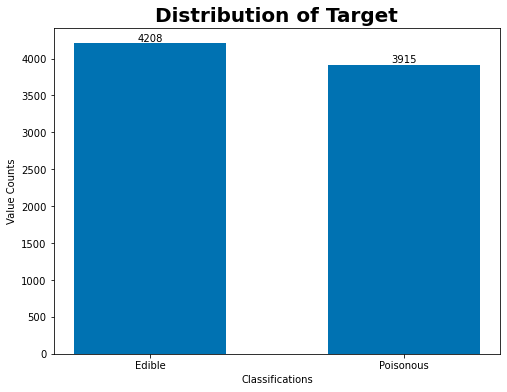

In [6]:
# Plot to determine distribution of target
classes = mushroom_target.value_counts()
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-colorblind')
b = plt.bar(classes.index.values, classes, width=0.6)
plt.bar_label(b)
plt.title(f"Distribution of Target", size=20,
            weight="bold")
plt.ylabel(f"Value Counts")
plt.xlabel("Classifications")
plt.xticks(classes.index.values, [x.title() for x in classes.index.values])
plt.show()


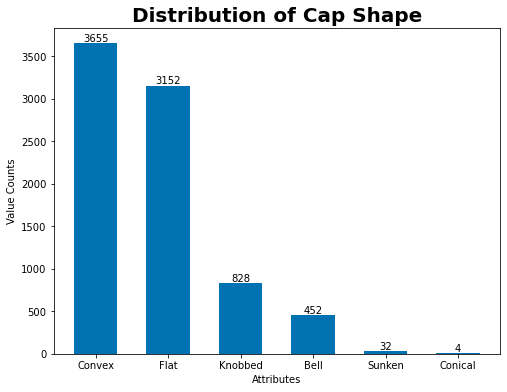

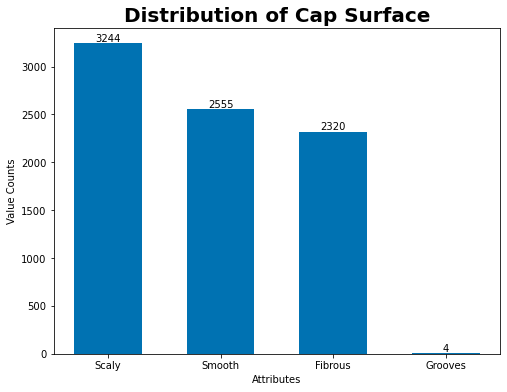

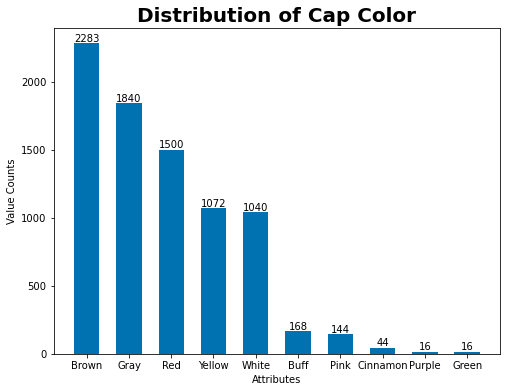

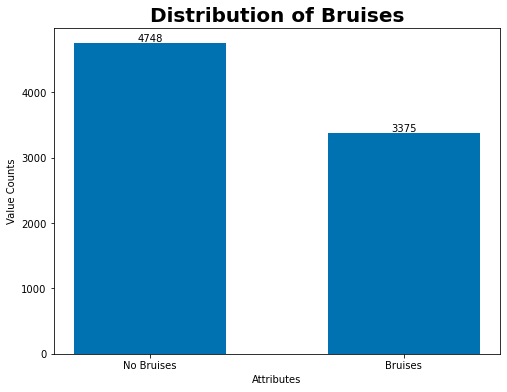

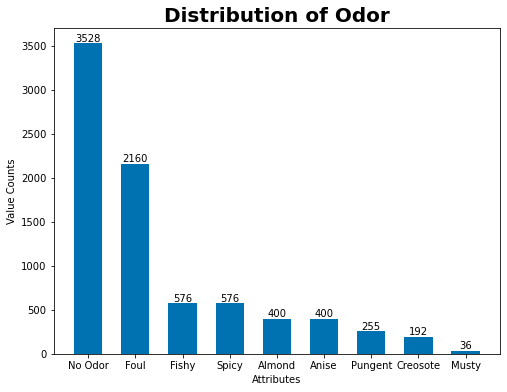

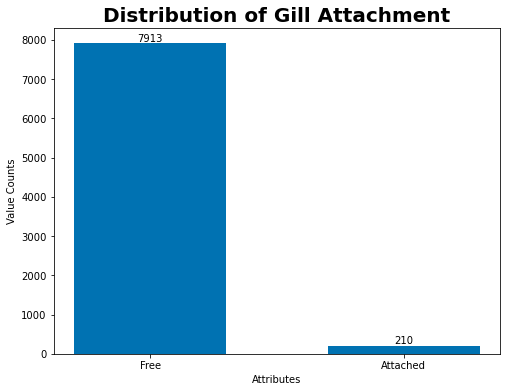

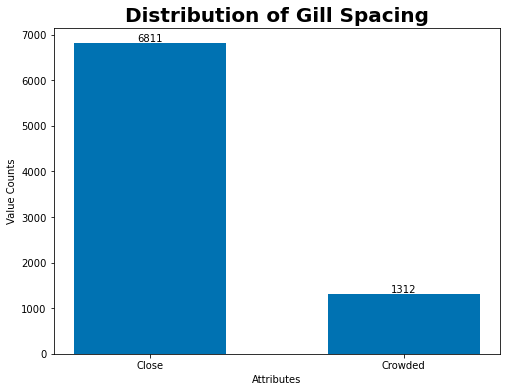

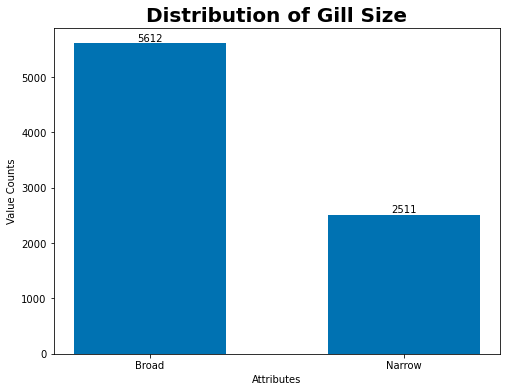

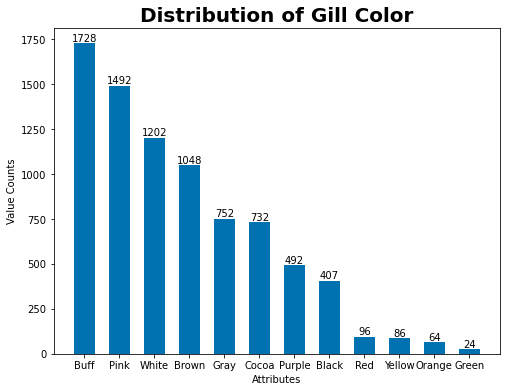

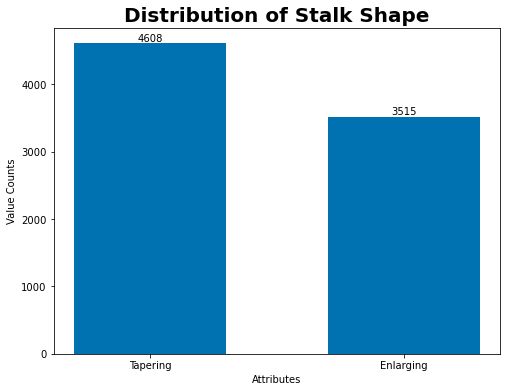

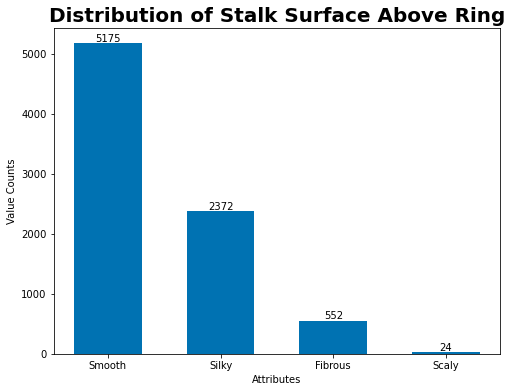

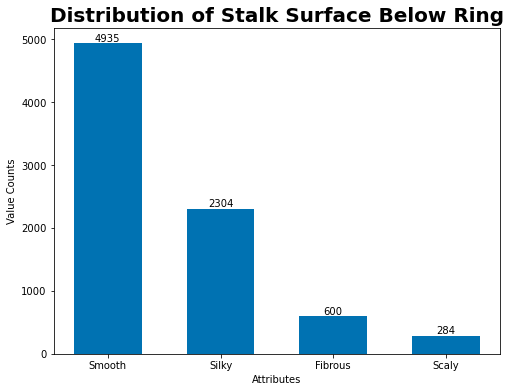

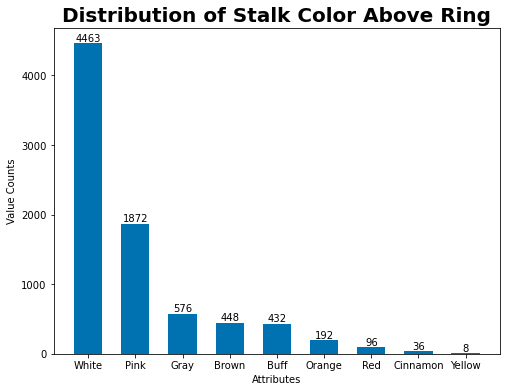

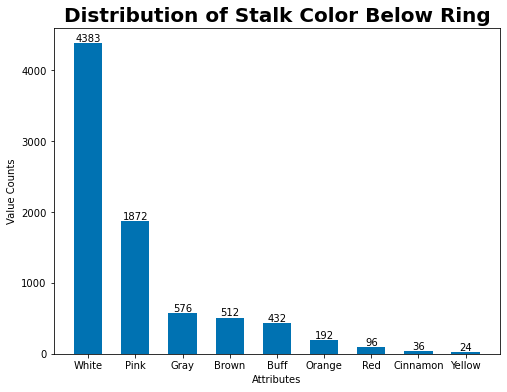

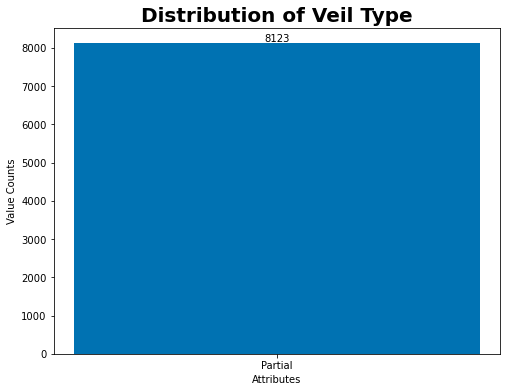

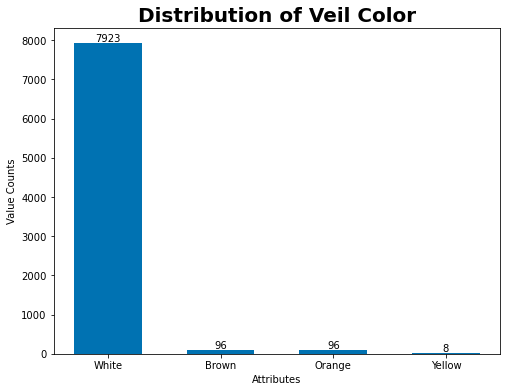

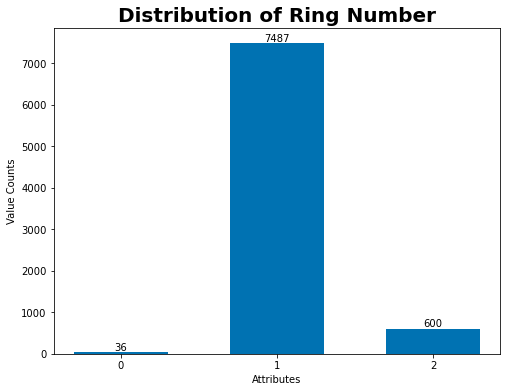

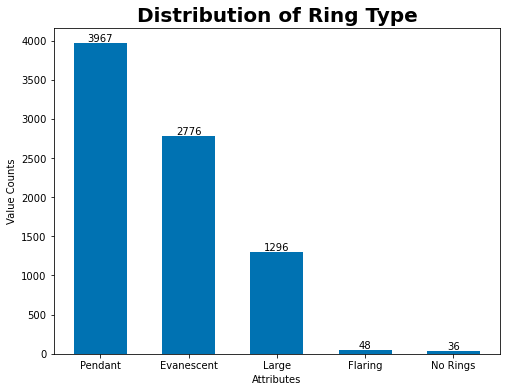

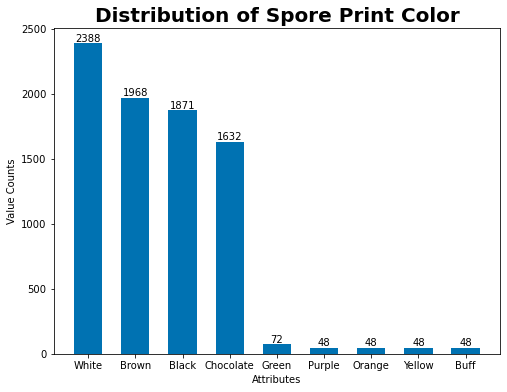

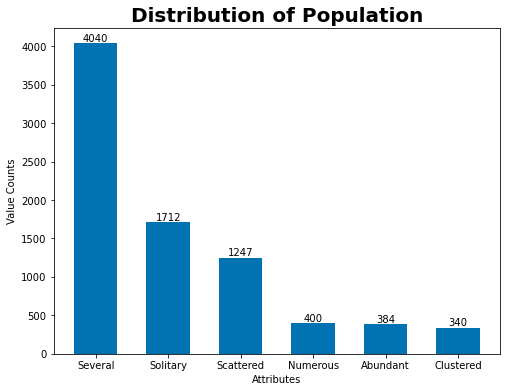

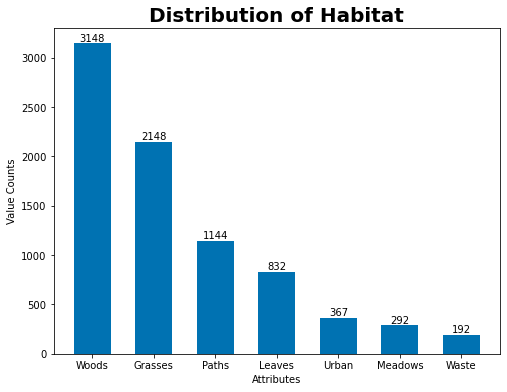

In [7]:
# Plot to determine distribution of attributes
for cat in mushrooms.columns:
    attributes = mushrooms[cat].value_counts()
    plt.figure(figsize=(8, 6))
    plt.style.use('seaborn-v0_8-colorblind')
    b = plt.bar(attributes.index.values, attributes, width=0.6)
    plt.bar_label(b)
    plt.title(f"Distribution of {cat.title()}", size=20,
            weight="bold")
    plt.ylabel(f"Value Counts")
    plt.xlabel("Attributes")
    
    plt.xticks(attributes.index.values, [str(x).title() for x in attributes.index.values])
    plt.show()


Since the distribution charts reveal that the veil type is the same for all mushrooms, I decided to also drop that column from the dataset since it will have no effect on the model classification. 

In [8]:
mushrooms = mushrooms.drop(columns=["veil type"])

### Finding the catergorical data columns and the numerical data columns

There is only one data column with numerical data: ring number.

In [9]:
# Select nonnumerical columns
obj_cols = col_selector(dtype_include=object)

# Create list of column names of features with catergorical data
cat_features = obj_cols(mushrooms)

# Create list of column names of features with numerical data
int_cols = col_selector(dtype_include="int64")
num_features = int_cols(mushrooms)

print(f"Categorical features: {str(cat_features)[1:-1]}")
print(f"Numerical features: {str(num_features)[1:-1]}")

Categorical features: 'cap shape', 'cap surface', 'cap color', 'bruises', 'odor', 'gill attachment', 'gill spacing', 'gill size', 'gill color', 'stalk shape', 'stalk surface above ring', 'stalk surface below ring', 'stalk color above ring', 'stalk color below ring', 'veil color', 'ring type', 'spore print color', 'population', 'habitat'
Numerical features: 'ring number'


### Encoding the data

In [10]:
# Create reference column of the dataframe
mush_copy = mushrooms.copy(deep=True)

# Encode categorical features
for i in range(len(cat_features)):
    mushrooms[cat_features[i]] = mushrooms[cat_features[i]].astype('category')
    mushrooms[cat_features[i]] = mushrooms[cat_features[i]].cat.codes

# Encode numerical features
st = StandardScaler()
st.fit_transform(mushrooms[num_features])

# Create a feature dictionary for encoding later example
feature_dict = {}
for category in mushrooms.columns:
    sub_cat = mush_copy[category].unique()
    encoded = mushrooms[category].unique()
    sub_dict = dict(zip(sub_cat, encoded))
    feature_dict[category] = sub_dict

# Encode target
lb = LabelEncoder()
mushroom_target = lb.fit_transform(mushroom_target)

# Preview the data again
mushrooms.head()

,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil color,ring number,ring type,spore print color,population,habitat
0,2,3,9,0,0,1,0,0,0,0,3,3,7,7,2,1,4,1,2,0
1,0,3,8,0,1,1,0,0,1,0,3,3,7,7,2,1,4,1,2,2
2,2,2,8,0,7,1,0,1,1,0,3,3,7,7,2,1,4,0,3,4
3,2,3,3,1,6,1,1,0,0,1,3,3,7,7,2,1,0,1,0,0
4,2,2,9,0,0,1,0,0,1,0,3,3,7,7,2,1,4,0,2,0


### Viewing data heatmap

Based on the below heatmap, the variables with the highest correlation are gill attachment and veil color. For low correlation, ring type has low correlation with bruises, gill size, and sproe print color. Correlation ranges from -0.2 to 0.4 for most feature relationships.

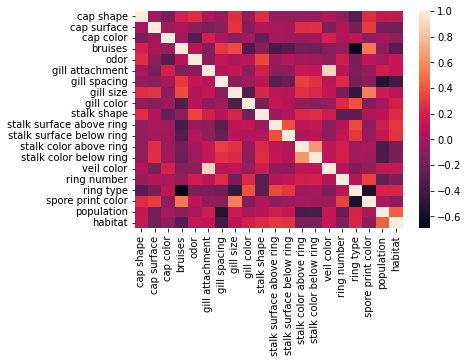

In [11]:
corr = mushrooms.corr(numeric_only=False)
sns.heatmap(corr)
plt.show()

## 2. Three Models

First, I split the data into a training dataset and a testing set.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(mushrooms, mushroom_target, test_size=0.2, random_state=42)

### Categorical Naive Bayes Classification

Since the data is primarily categorical, I used CategoricalNB to build a model.

Accuracy: 96.31%
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       853
           1       0.99      0.93      0.96       772

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



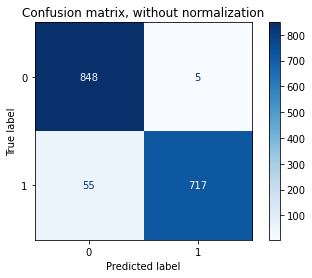

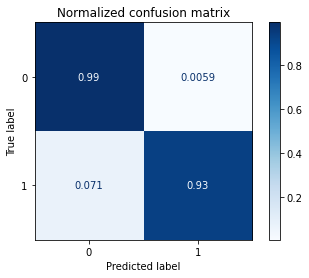

In [13]:
# Create and train model
model = CategoricalNB(alpha=1)
model.fit(x_train, y_train)

# Test model
y_pred = model.predict(x_test)
test_accuracy = model.score(x_test, y_test)
print(f"Accuracy: {test_accuracy:.2%}")

report = classification_report(y_test, y_pred)  # actual, predicted
print(report)


# Plot confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        display_labels=model.classes_,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()

### Random Forest Classification

The next classification model uses Random Forest.

In [14]:
# Create a Random Forest instance
rfc=RandomForestClassifier(random_state=42)

# Select features based on importance weights
sel = SelectFromModel(rfc)
sel.fit(x_train, y_train)

x = sel.get_support()

# Add names of important columns to a list
col_important = mushrooms.columns[x]
col_important = [x for x in col_important]

print("Important features:")
print(*col_important, sep=', ')


Important features:
odor, gill size, ring type, spore print color, population


In [15]:
# Create training and test datasets based on important features
x_train, x_test, y_train, y_test = train_test_split(mushrooms[col_important], mushroom_target, test_size=0.2, random_state=42)

# List parameters
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' : ['gini', 'entropy']
}

# Create instance of GridSearch with classifier and param_grid
clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit with training dataset
final_clf = clf.fit(x_train, y_train)

# Find best parameters for classifier
best_params = final_clf.best_params_
print(best_params)

# Create model with best parameters
rfclassifier = RandomForestClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], 
                                      max_features=best_params['max_features'], n_estimators=best_params['n_estimators'])

# Fit classifier with training dataset
rfclassifier.fit(x_train, y_train)

# Predict classes on test dataset
y_pred = rfclassifier.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred, zero_division=0.0))

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy: 99.82%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



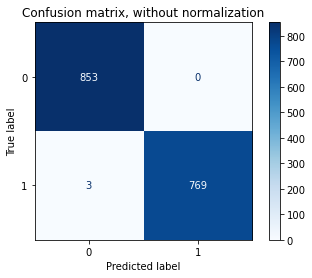

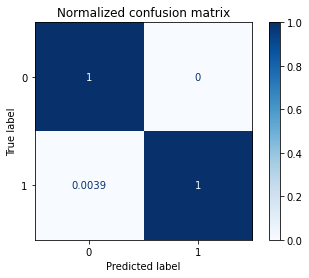

In [16]:
# Plot confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rfclassifier,
        x_test,
        y_test,
        display_labels=rfclassifier.classes_,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()

### Logistic Regression

In [17]:
# Create training and test datasets
x_train, x_test, y_train, y_test = train_test_split(mushrooms, mushroom_target, test_size=0.2, random_state=42)

# Create first pipeline for base without reducing features
pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param_grid
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
]

# Create instance of GridSearch with classifier and param_grid
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit classifier with training dataset
logreg_clf = clf.fit(x_train, y_train)

# Predict classes on test dataset
y_pred = logreg_clf.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred, zero_division=0.0))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Accuracy: 93.78%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       853
           1       0.94      0.93      0.93       772

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



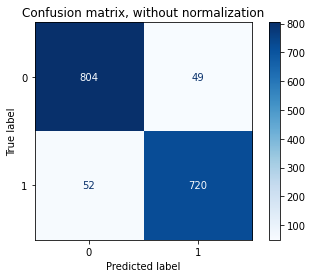

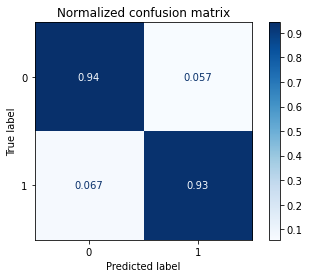

In [18]:
# Plot confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        logreg_clf,
        x_test,
        y_test,
        display_labels=logreg_clf.classes_,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()

### Using the model

Since the Random Forest Classifier was the most accurate, I used it in the following example for a mushroom classification. This example presents the probability of a mushroom being poisonous/edible based on the provided features/conditions.

In [19]:
# Provide an example of a mushroom
a_mushroom = ["flat", "scaly", "brown", "no bruises", "fishy", "free", "close", "narrow", "buff", "tapering", "smooth", "silky", "pink", "white", "white", 1, "evanescent", "white", "several", "paths"]

# Encode mushroom example
a_mushroom_encoded = pd.DataFrame({key: [feature_dict[key][attr]] for (key, attr) in zip(feature_dict.keys(), a_mushroom)})

class_dict = {0: "Edible", 1: "Poisonous"}

# Predict class using Random Forest
prediction = rfclassifier.predict(a_mushroom_encoded[col_important])
probabilities = rfclassifier.predict_proba(a_mushroom_encoded[col_important])

print(f"Predicted class: {class_dict[prediction[0]]}")
print(f"Class probabilites: Edible - {probabilities[0][0]:.2%}, Poisonous - {probabilities[0][1]:.2%}")

Predicted class: Poisonous
Class probabilites: Edible - 0.05%, Poisonous - 99.95%


In the above example, the model determines that the mushroom is poisonous. Do not eat this mushroom!

## 3. TensorFlow Mushroom Classification

I also wanted to see if I could classify images of mushrooms using TensorFlow. This classification, however, does not determine whether or not a mushroom is poisonous but classifies the mushroom into its genus. I would like to at some point build the mushroom image classifier to determine not only the genus but also edibility of each mushroom. However, the image dataset available to me did not include information on whether or not a mushroom is poisonous.

Data set can be obtained at:  https://www.kaggle.com/datasets/maysee/mushrooms-classification-common-genuss-images?resource=download

In [20]:
# Access image directory and count number of files
mush_dir = pathlib.Path('mushroom_img/')
image_count = len(list(mush_dir.glob('**/*.jpg')))
print(image_count)

6714


In [21]:
# Define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

# Create training dataset
train_imgs = tf.keras.utils.image_dataset_from_directory(
  mush_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Create test dataset
val_imgs = tf.keras.utils.image_dataset_from_directory(
  mush_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6714 files belonging to 9 classes.
Using 5372 files for training.
Found 6714 files belonging to 9 classes.
Using 1342 files for validation.


#### Preview data

In [22]:
# View class names (genuses)
class_names = train_imgs.class_names
print(class_names)

['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']


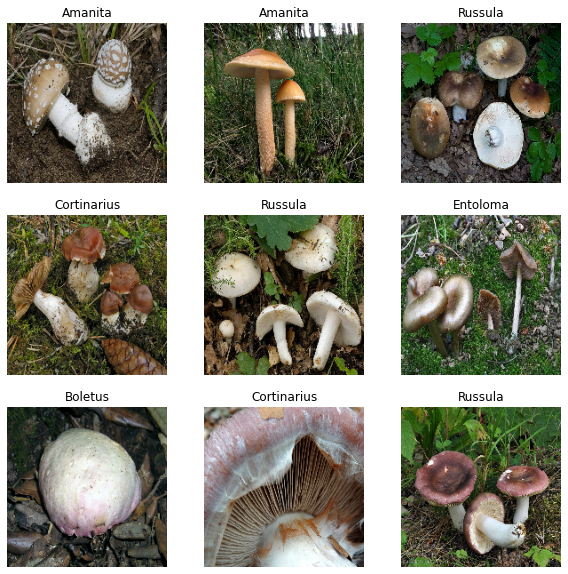

In [23]:
# Preview images in the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_imgs.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### Configure the dataset for performance using buffered prefetching

In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train = train_imgs.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test = val_imgs.cache().prefetch(buffer_size=AUTOTUNE)

#### Standardize the data

In [26]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

#### Create model

In [27]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [28]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

#### Fit model with data

In [29]:
epochs = 10
history = model.fit(
  train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/10
168/168 [==============================] - 32s 187ms/step - loss: 1.9391 - accuracy: 0.2859 - val_loss: 1.8628 - val_accuracy: 0.3100
Epoch 2/10
168/168 [==============================] - 30s 181ms/step - loss: 1.6959 - accuracy: 0.3805 - val_loss: 1.7368 - val_accuracy: 0.3696
Epoch 3/10
168/168 [==============================] - 30s 176ms/step - loss: 1.5440 - accuracy: 0.4456 - val_loss: 1.6738 - val_accuracy: 0.4091
Epoch 4/10
168/168 [==============================] - 28s 167ms/step - loss: 1.2796 - accuracy: 0.5436 - val_loss: 1.8020 - val_accuracy: 0.3957
Epoch 5/10
168/168 [==============================] - 28s 168ms/step - loss: 0.9093 - accuracy: 0.6728 - val_loss: 1.8972 - val_accuracy: 0.3987
Epoch 6/10
168/168 [==============================] - 30s 179ms/step - loss: 0.4864 - accuracy: 0.8341 - val_loss: 2.6181 - val_accuracy: 0.3912
Epoch 7/10
168/168 [==============================] - 30s 177ms/step - loss: 0.1834 - accuracy: 0.9460 - val_loss: 3.6023 - val_ac

#### Visualize model results

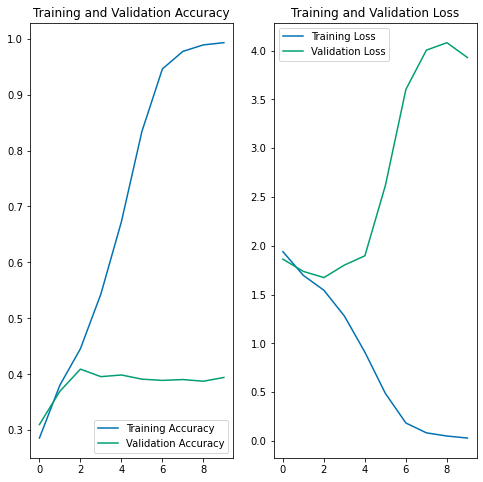

In [30]:
# Plot the loss and accuracy on the training and test sets
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
loss = history.history['loss']
test_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are way off from each other, and the model has achieved only around 40% accuracy on the test data. Since the accuracy of this model is so poor, further techniques should be applied to hopefully increase the overall performance of the model.

## Conclusion

### Key takeaways
1. Primary data set was pretty clean and did not require a lot of data manipulation. Only two columns were removed: root stalk, which had quite a few null values, and veil type, which had the same value for all entries.
2. The best classifier (highest accuracy) for the primary dataset was the Random Forest Classifier.
3. The classifier for the image dataset did not perform well; further work to tune the model is required. 

### Further work to be done
If I were to continue my work on this data, I would explore the following:
- Further tune the TensorFlow model to more accurately classify the mushrooms into their appropriate genuses.
- Further update the TensorFlow model to also classify the mushrooms as edible or poisonous based on physical characteristics and genus.

### Would I rely on the TensorFlow or Random Forest model for mushroom hunting?
- For the TensorFlow classifier, absolutely not since the accuracy is so low. The model needs to be tuned further.
- As for the Random Forest Classifier, probably not. Based on the confusion martrix, 3 of the poisonous mushrooms were listed as edible, whereas none of edible mushrooms were listed poisonous. Even though the Random Forest classifier has fairly high accuracy, I would not like to eat a mushroom that was deemed edible but really was poisonous. 